In [1]:
from utils.game import *
from utils.agent import *
from utils.world import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

map_graph = np.array([
    [0, 1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])
G = nx.from_numpy_array(map_graph)
pos = nx.spring_layout(G)

# Nb player
nb_player = 3

# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = np.array([
    [2, 1, 0, 0, 0, 0],
    [0, 0, 3, 2, 0, 0],
    [0, 0, 0, 0, 5, 2]
])

# World Map


c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)

colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]

countries = {0 : "N. America",
            1 : "S. America",
            2 : "Europe",
            3 : "Africa",
            4 : "Asia",
            5 : "Oceania"
            }

labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}
# labels = {i:f"{countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}

print(owner, troops)
print(colors)
print(labels)

[0 0 1 1 2 2] [2 1 3 2 5 2]
['red', 'red', 'blue', 'blue', 'green', 'green']
{0: '0: N. America (2)', 1: '1: S. America (1)', 2: '2: Europe (3)', 3: '3: Africa (2)', 4: '4: Asia (5)', 5: '5: Oceania (2)'}


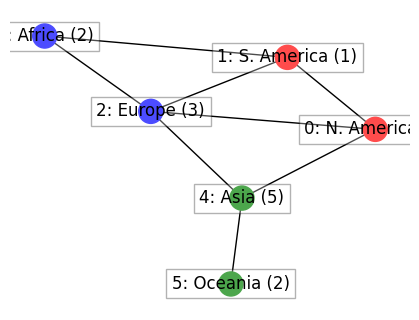

In [3]:
plt.figure(figsize=(4,3))
plt.tight_layout()
G = nx.from_numpy_array(map_graph)
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, pos, node_color=colors, labels=labels, bbox=label_options)
plt.show()


Try calling the main classes

In [4]:
agent = PolicyGradientAgent()
world = World(map_graph, presence_map_start, nb_players=3)
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)

Try the World functions

In [11]:
# Start
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
print("Presence map:\n", game.world.presence_map)
print("Player 0 territories: ", world.get_territories(0))

# Reinforcements
to_deploy = game.world.get_reinforcements(p=0)
print("Reinforcements for player 0: ", to_deploy)

# Deployment
game.world.deploy(p=0, t=0, n=to_deploy)
print("Presence map after deployment:\n", game.world.presence_map)

# Attack
attacks = game.world.get_available_targets(p=0)
print("Possible attacks: ", attacks)
if len(attacks) > 0:
    chosen_attack = attacks[0]
    player_attacked = game.world.get_owner(chosen_attack[1])
    print("Chosen attack: ", chosen_attack, " ; player attacked: ", player_attacked)
    game.resolve_battle(player1=0, player2=player_attacked,
                        t_orig=chosen_attack[0], t_dest=chosen_attack[1])
    print("Presence map after attack:\n", game.world.presence_map)

# Fortification
available_fortifications = game.world.get_available_fortifications(p=0)
print("Available fortifications: ", available_fortifications)
if len(available_fortifications) > 0:
    chosen_fortification = available_fortifications[0]
    print("Chosen fortification: ", chosen_fortification)
    game.world.fortify(p=0, t_orig=0, t_dest=1, n=(game.world.presence_map[0][chosen_fortification[0]]-1))
    print("Presence map after fortification:\n", game.world.presence_map)


Presence map:
 [[2 1 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Player 0 territories:  [0, 1]
Reinforcements for player 0:  6
Presence map after deployment:
 [[8 1 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Possible attacks:  [(0, 2), (0, 4)]
Chosen attack:  (0, 2)  ; player attacked:  1
Battle won!
Presence map after attack:
 [[2 1 6 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 5 2]]
Available fortifications:  [(0, 1), (0, 2), (2, 0), (2, 1)]
Chosen fortification:  (0, 1)
Presence map after fortification:
 [[1 2 6 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 5 2]]
